# **Models of stock return**


**01. Set-up the environment**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import Tesla historical stock data

tsla = pd.read_csv('/content/drive/MyDrive/TSLA.csv', index_col='Date')
tsla.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-21,14.800667,14.881333,14.506667,14.722000,14.722000,116914500
2019-08-22,14.853333,15.026667,14.548000,14.810000,14.810000,98385000
2019-08-23,14.664667,14.744667,14.066667,14.093333,14.093333,128079000
2019-08-26,14.240000,14.334667,14.102667,14.333333,14.333333,75778500
2019-08-27,14.382667,14.586667,14.135333,14.272000,14.272000,81243000


**02. Distribution of Log return**

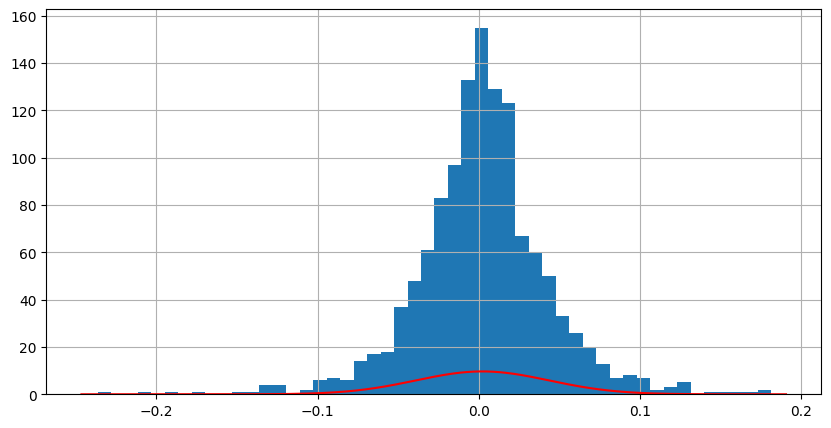

In [14]:
# Calculation of log daily return

tsla['LogReturn'] = np.log(tsla['Close']).shift(-1) - np.log(tsla['Close'])

#Graphical representation of Tesla stocks' distribution of log return

from scipy.stats import norm
mu = tsla['LogReturn'].mean()
sigma = tsla['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(tsla['LogReturn'].min()-0.01, tsla['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

tsla['LogReturn'].hist(bins=50, figsize=(10,5))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

**3. Calculate the probability of stock price dropping over a certain percentage amount in a day**



In [15]:
# Computation of the propability that Tesla stock price will drop over 5% and 10% in a day

prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The probability of a drop over 5% is ', prob_return1)

prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of a drop over 10% is ', prob_return1)

The probability of a drop over 5% is  0.10327068541872164
The probability of a drop over 10% is  0.0066792426795433835


**4. Calculate the probability of stock price dropping over a certain percentage amount in a year**

In [16]:
# Computation of the propability that Tesla stock price will drop over 40% and 20% in 220 days

mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of a drop over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))
print('The probability of a drop over 20% in 220 days is ', norm.cdf(-0.2, mu220, sigma220))


The probability of a drop over 40% in 220 days is  0.07673593735639628
The probability of a drop over 20% in 220 days is  0.1354895912421386


5. **Calculate Value at risk (VaR)**

In [17]:
# Calculation of daily VaR

VaR=norm.ppf(0.05, mu, sigma)
print('Single day value at risk is ', VaR)

# Calculation of 25%, 75%, 5% and 95% quantiles of the return
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile is ', q25)
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile is ', q75)
q5 = norm.ppf(0.05, mu, sigma)
print('5% quantile is ', q5)
q95 = norm.ppf(0.95, mu, sigma)
print('95% quantile is ', q95)

Single day value at risk is  -0.06576141953212115
25% quantile is  -0.025694646092919292
75% quantile is  0.030005341624126818
5% quantile is  -0.06576141953212115
95% quantile is  0.07007211506332865
